# Intro
Name:  

    Explore_cld_retrieval

Purpose:  

    Run throught the retrieved cloud properties and either flag or assure retrieval quality
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 4STAR_cloud retrieval .mat files
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2016-12-07
     Ported from ORACLES to NAAMES

# Import of modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# set the basic directory path
fp = 'C:/Users/sleblan2/Research/NAAMES/starzen/'
fp_plot = 'C:/Users/sleblan2/Research/NAAMES/plot/'

In [3]:
vv = 'v1'

# Load the files

In [4]:
dds = ['20151104','20151109','20151112','20151114','20151117','20151118','20151123']

In [5]:
rts = []
sps = []

In [6]:
for daystr in dds:
    print daystr
    rt = hs.loadmat(fp+'{}_zen_cld_retrieved.mat'.format(daystr))
    s = sio.loadmat(fp+'{}starzen.mat'.format(daystr))
    sp = Sp.Sp(s)
    rts.append(rt)
    sps.append(sp)

20151117
1556 1556
in rads
(340L, 1556L) 2 1556
1 in ui
(340L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151104
1556 1556
in rads
(366L, 1556L) 2 1556
1 in ui
(366L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151109
1556 1556
in rads
(234L, 1556L) 2 1556
1 in ui
(234L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151112
1556 1556
in rads
(140L, 1556L) 2 1556
1 in ui
(140L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151114
1556 1556
in rads
(850L, 1556L) 2 1556
1 in ui
(850L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151118
1556 1556
in rads
(1362L, 1556L) 2 1556
1 in ui
(1362L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20151123
1556 1556
i

# Start plotting the results

In [7]:
rt.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


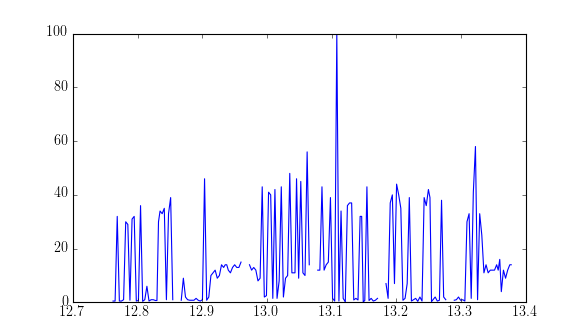

In [8]:
plt.figure()
plt.plot(rt['utc'],rt['tau'])

In [14]:
rt = rts[9]

<IPython.core.display.Javascript object>


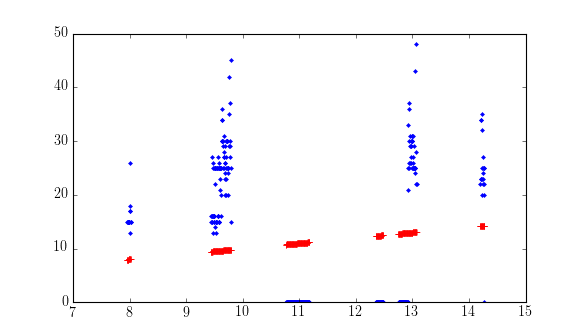

In [15]:
plt.figure()
plt.plot(rts[9]['utc'],rts[9]['tau'],'.')
plt.plot(rts[9]['utc'],rts[9]['utc'],'r+')

<IPython.core.display.Javascript object>


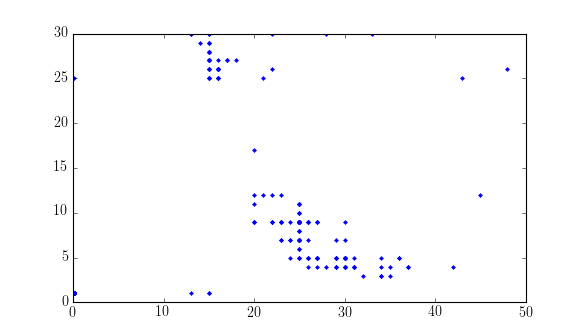

In [16]:
plt.figure()
plt.plot(rts[9]['tau'],rts[9]['ref'],'.')

In [12]:
igood = rts[9]['tau']>0

In [13]:
igood[0:10]

array([False, False, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [14]:
sp = sps[9]

<IPython.core.display.Javascript object>


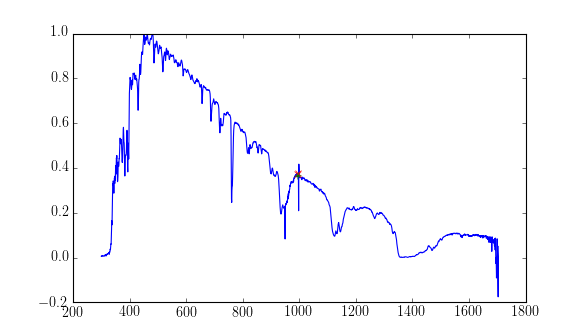

In [15]:
i=68
i_vis = [1061,1062,1064]
i_nir = [1060,1063]
plt.figure()
plt.plot(sp.wvl,sp.norm[i,:])
#plt.xlim(970,1030)
plt.plot(sp.wvl[i_vis],sp.norm[i,i_vis],'rx')
plt.plot(sp.wvl[i_nir],sp.norm[i,i_nir],'g+')


In [16]:
np.nanmean(sp.norm[i,iw])

NameError: name 'iw' is not defined

In [17]:
np.nanmean(sp.norm[i,ii])

NameError: name 'ii' is not defined

## Plot some of the sza for each day to ensure good fitting of lut

<IPython.core.display.Javascript object>


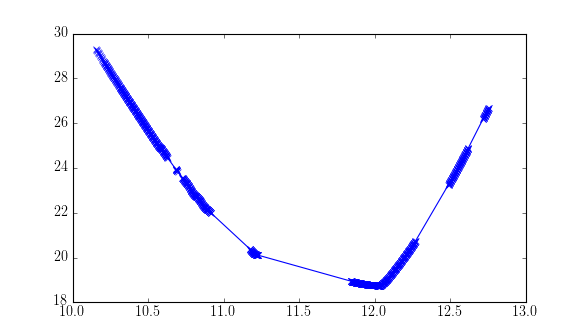

In [70]:
plt.figure()
plt.plot(sps[7].utc,sps[7].sza,'x-')

# Now setup filters to weed out bad data

## Filter out data points where nir and vis spectrometers don't match

In [9]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [10]:
for i,daystr in enumerate(dds):
    nvis = np.nanmean(sps[i].norm[:,i_vis],axis=1)
    nnir = np.nanmean(sps[i].norm[:,i_nir],axis=1)
    rts[i]['delta'] = abs(nvis-nnir)
    rts[i]['fl_match'] = rts[i]['delta']<0.06
    print daystr,rts[i]['delta'].shape,rts[i]['delta'][rts[i]['fl_match']].shape,\
        float(rts[i]['delta'][rts[i]['fl_match']].shape[0])/ float(rts[i]['delta'].shape[0])*100.0

20151117 (340L,) (182L,) 53.5294117647
20151104 (366L,) (139L,) 37.9781420765
20151109 (234L,) (149L,) 63.6752136752
20151112 (140L,) (110L,) 78.5714285714
20151114 (850L,) (630L,) 74.1176470588
20151118 (1362L,) (621L,) 45.5947136564
20151123 (329L,) (136L,) 41.3373860182


## Now filter out the times which were at too high altitude

In [28]:
fl_alt = rt['alt']<2500.0

In [29]:
for i,daystr in enumerate(dds):
    rts[i]['fl_alt'] = rts[i]['alt'][:,0]<2500.0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_alt']].shape,\
        float(rts[i]['utc'][rts[i]['fl_alt']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20151117 (340L,) (340L,) 100.0
20151104 (366L,) (264L,) 72.131147541
20151109 (234L,) (55L,) 23.5042735043
20151112 (140L,) (17L,) 12.1428571429
20151114 (850L,) (386L,) 45.4117647059
20151118 (1362L,) (1241L,) 91.1160058737
20151123 (329L,) (307L,) 93.3130699088


## Filter for in cloud

In [33]:
from write_utils import nearest_neighbor

In [34]:
for i,daystr in enumerate(dds):
    try:
        p_time = mat2py_time(p.variables['timevec_{}'.format(daystr)].data)
    except KeyError: # no in cloud data, so choose all of them
        rts[i]['fl_incld'] = rts[i]['utc']>0.0
        continue
    putc = toutc(p_time)
    rts[i]['incld'] = nearest_neighbor(putc,p.variables['cloud_time_{}'.format(daystr)].data,rts[i]['utc'],dist=1.0/3600)
    rts[i]['fl_incld'] = rts[i]['incld']==0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_incld']].shape,\
        float(rts[i]['utc'][rts[i]['fl_incld']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160902 (1013L,) (707L,) 69.7926949654
20160904 (1858L,) (911L,) 49.0312163617
20160906 (1120L,) (762L,) 68.0357142857
20160908 (105L,) (44L,) 41.9047619048
20160910 (1415L,) (766L,) 54.1342756184
20160912 (662L,) (350L,) 52.8700906344
20160914 (438L,) (199L,) 45.4337899543
20160918 (553L,) (333L,) 60.2169981917
20160920 (341L,) (282L,) 82.6979472141
20160924 (1369L,) (359L,) 26.2235208181
20160925 (600L,) (267L,) 44.5
20160927 (145L,) (106L,) 73.1034482759


## Filter for high ki squared residuas

In [30]:
for i,daystr in enumerate(dds):
    rts[i]['fl_ki'] = rts[i]['ki']<1.5
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_ki']].shape,\
        float(rts[i]['utc'][rts[i]['fl_ki']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20151117 (340L,) (117L,) 34.4117647059
20151104 (366L,) (197L,) 53.825136612
20151109 (234L,) (77L,) 32.905982906
20151112 (140L,) (21L,) 15.0
20151114 (850L,) (221L,) 26.0
20151118 (1362L,) (316L,) 23.201174743
20151123 (329L,) (163L,) 49.5440729483


## Combine the filters

In [31]:
tot=0
tot_fl=0
for i,daystr in enumerate(dds):
    rts[i]['fl'] = rts[i]['fl_match'] & rts[i]['fl_alt']  & rts[i]['fl_ki'] #& rts[i]['fl_incld']
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl']].shape,\
        float(rts[i]['utc'][rts[i]['fl']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0 
    tot = tot+len(rts[i]['utc'])
    tot_fl = tot_fl+len(rts[i]['utc'][rts[i]['fl']])

20151117 (340L,) (68L,) 20.0
20151104 (366L,) (69L,) 18.8524590164
20151109 (234L,) (21L,) 8.97435897436
20151112 (140L,) (3L,) 2.14285714286
20151114 (850L,) (0L,) 0.0
20151118 (1362L,) (140L,) 10.2790014684
20151123 (329L,) (60L,) 18.2370820669


In [32]:
print tot, tot_fl, float(tot_fl)/float(tot)*100.0

3621 361 9.96962165148


# Now plot each retrieved product, filtered

In [26]:
from Sp_parameters import smooth

<IPython.core.display.Javascript object>


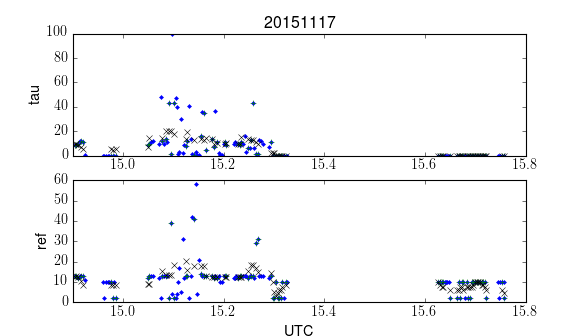

<IPython.core.display.Javascript object>


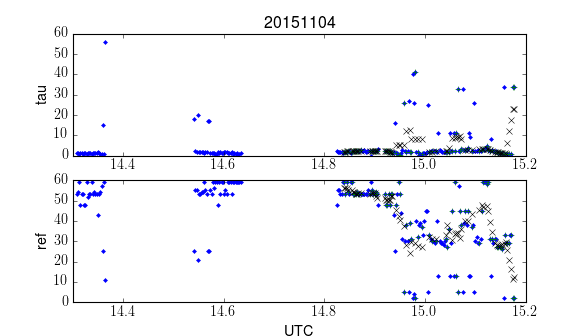

<IPython.core.display.Javascript object>


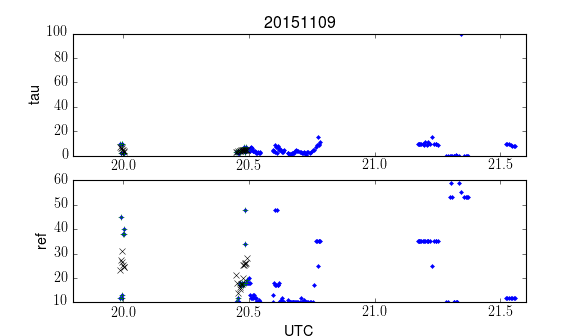

<IPython.core.display.Javascript object>


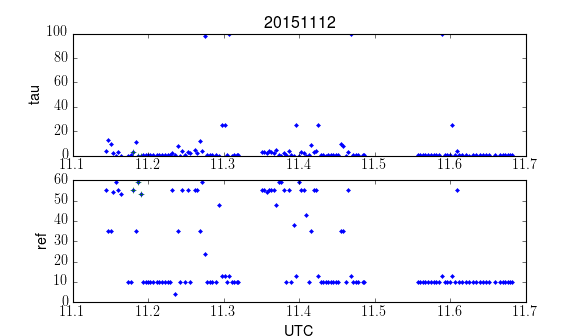

<IPython.core.display.Javascript object>


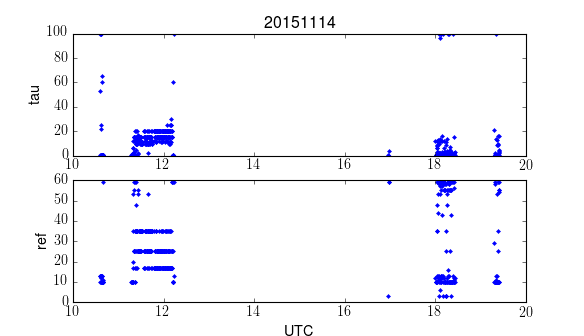

<IPython.core.display.Javascript object>


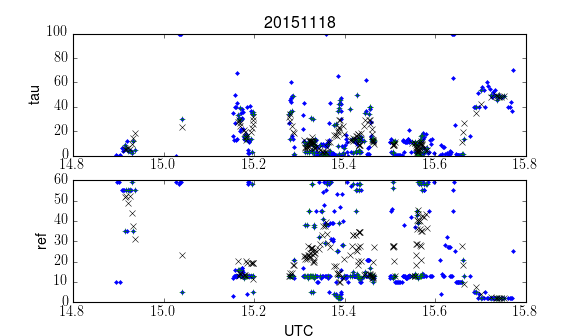

<IPython.core.display.Javascript object>


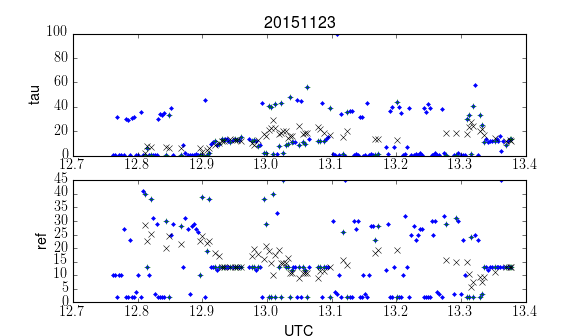

In [33]:
for i,daystr in enumerate(dds):
    plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212,sharex=ax1)
    ax1.plot(rts[i]['utc'],rts[i]['tau'],'b.')
    ax1.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['tau'][rts[i]['fl']],'g+')
    try:
        ax1.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['tau'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax1.set_ylabel('tau')
    
    ax2.plot(rts[i]['utc'],rts[i]['ref'],'b.')
    ax2.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['ref'][rts[i]['fl']],'g+')
    try:
        ax2.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['ref'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax2.set_ylabel('ref')
    ax2.set_xlabel('UTC')
    ax1.set_title(daystr)

In [34]:
for i,daystr in enumerate(dds):
    try:
        rts[i]['tau_fl'] = smooth(rts[i]['tau'][rts[i]['fl']],6)
        rts[i]['ref_fl'] = smooth(rts[i]['ref'][rts[i]['fl']],6)
    except:
        print 'except',i
        rts[i]['tau_fl'] = rts[i]['tau'][rts[i]['fl']]
        rts[i]['ref_fl'] = rts[i]['ref'][rts[i]['fl']]
    rts[i]['lat_fl'] = rts[i]['lat'][rts[i]['fl']]
    rts[i]['lon_fl'] = rts[i]['lon'][rts[i]['fl']]
    rts[i]['alt_fl'] = rts[i]['alt'][rts[i]['fl']]
    rts[i]['utc_fl'] = rts[i]['utc'][rts[i]['fl']]

except 4


In [35]:
rt.keys()

['fl_match',
 u'tau',
 'fl_ki',
 'alt_fl',
 u'utc',
 'fl',
 u'ki',
 u'sza',
 u'lon',
 'tau_fl',
 'lat_fl',
 'utc_fl',
 u'lat',
 'fl_alt',
 'delta',
 u'phase',
 u'alt',
 u'ref',
 'ref_fl',
 'lon_fl']

# Now write these values to ict file

In [36]:
import write_utils as wu

In [37]:
hdict = {'PI':'Jens Redemann',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)',
     'campaign':'NAAMES 2015',
     'special_comments':'Retrieved cloud properties',
     'PI_contact':'Jens.Redemann-1@nasa.gov',
     'platform':'NASA C130',
     'location':"based out of St-John's Newfoundland, Canada, actual location of measurement included in file",
     'instrument_info':'Derived product from 4STAR zenith measurements',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT',
     'uncertainty':'Undefined in preliminary archival',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'NAAMES 2015 deployment; November 2015; North Atlantic Ocean',
     'stipulations':'Use of these data requires PRIOR OK from the PI; this is preliminary data',
     'rev_comments':"""R0: Preliminary archival of cloud properties retrieived from 4STAR sky radiance measurements. 
    Final radiance calibration not yet applied. Filtered out in-cloud data, bad measurements, and high clouds. 
    Data is subject to uncertainties linked to detector stability, transfer efficiency of light through fiber optic cable, and deposition on the instrument window."""
    }
order = ['LAT','LON','COD','REF']

In [39]:
for i,daystr in enumerate(dds):
    d_dict = {'Start_UTC':{'data':rts[i]['utc'][rts[i]['fl']]*3600.0,'unit':'seconds from midnight UTC','long_description':'time keeping'},
              'utc':{'data':rts[i]['utc'][rts[i]['fl']],'unit':'seconds from midnight UTC','long_description':'time keeping'},
          'COD':{'data':rts[i]['tau_fl'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
          'REF':{'data':rts[i]['ref_fl'],'unit':'micrometer','long_description':'Cloud drop effective radius for liquid clouds'},
          'LAT':{'data':rts[i]['lat'][rts[i]['fl']],'unit':'Degrees','long_description':'Latitude of measurement, negative for Southern hemisphere'},
          'LON':{'data':rts[i]['lon'][rts[i]['fl']],'unit':'Degrees','long_description':'Longitude of measurement, East is positive, from -180 to 180'}
          }
    try:
        d_dict_out = wu.prep_data_for_ict(d_dict,in_var_name='utc',out_var_name='Start_UTC', in_input=True,time_interval=1.0)
        wu.write_ict(hdict,d_dict_out,filepath=fp+'..//zen_ict/',
                     data_id='4STAR_CLD',loc_id='C130',date=daystr,rev='R0',order=order)    
    except IndexError:
        pass

LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/NAAMES/starzen/..//zen_ict/4STAR-CLD_C130_20151117_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/NAAMES/starzen/..//zen_ict/4STAR-CLD_C130_20151104_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/NAAMES/starzen/..//zen_ict/4STAR-CLD_C130_20151109_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/NAAMES/starzen/..//zen_ict/4STAR-CLD_C130_20151118_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/NAAMES/starzen/..//zen_ict/4STAR-CLD_C130_20151123_R0.ict


## For use of this python, save values to mat files

In [40]:
import hdf5storage as hs

In [41]:
rtss = {str(i):rr for i,rr in enumerate(rts)}

In [42]:
def dict_keys_to_unicode(d):
    out = dict()
    for k, v in d.items():
        out[k.decode()] = v
    return out

for n in rtss.keys():
    if type(rtss[n]) is list:
        print n
        for i,t in enumerate(rtss[n]):
            rtss[n][i] = dict_keys_to_unicode(t)
    else:
        print 'no',n
        rtss[n] = dict_keys_to_unicode(rtss[n])


no 1
no 0
no 3
no 2
no 5
no 4
no 6


In [45]:
hs.savemat(fp+'..//zen_ict/{}_all_retrieved.mat'.format(vv),rtss)

## Optionally load the saved mat files

In [7]:
rtss = hs.loadmat(fp+'..//zen_ict/{}_all_retrieved.mat'.format(vv))

In [13]:
rk = rtss.keys()

In [14]:
rk.sort()

In [15]:
rk

[u'0', u'1', u'2', u'3', u'4', u'5', u'6']

In [16]:
if not rts:
    rts = []
    for n in rk:
        rts.append(rtss[n])

# Make plots

## Read the files as a verification

In [17]:
from load_utils import load_ict

In [18]:
vv = 'R0'
out_RA = []
out_head_RA = []
for d in dds:
    fname_aod = fp+'..//zen_ict/4STAR-CLD_C130_{}_{vv}.ict'.format(d,vv=vv)
    try:
        tt,th = load_ict(fname_aod,return_header=True)
        out_RA.append(tt)
        out_head_RA.append(th)
    except:
        pass

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')


In [19]:
out_head_RA[0]

['41, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'NAAMES 2015\n',
 '1,1\n',
 '2015,11,04,2016,12,07\n',
 '1.0\n',
 'Start_UTC, Seconds, Time of measurement continuous starting from midnight UTC\n',
 '4\n',
 '1,1,1,1\n',
 '-9999.000,-9999.000,-9999.000,-9999.000\n',
 'LAT, Degrees, Latitude of measurement, negative for Southern hemisphere\n',
 'LON, Degrees, Longitude of measurement, East is positive, from -180 to 180\n',
 'COD, None, Cloud Optical Depth of overlying cloud\n',
 'REF, micrometer, Cloud drop effective radius for liquid clouds\n',
 '1\n',
 'Retrieved cloud properties\n',
 '22\n',
 '-----------------------------------------------------------------------------\n',
 'PI_CONTACT_INFO: Jens.Redemann-1@nasa.gov\n',
 'PLATFORM: NASA C130\n',
 "LOCATION: based out of St-John's Newfoundland, Canada, actual location of measurement included in file\n",
 'ASSOCIATED_DATA: N/A\n',
 'INSTR

In [20]:
nm = out_RA[0].dtype.names

In [21]:
nm

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')

In [22]:
ax[0].get_xticks()

NameError: name 'ax' is not defined

In [83]:
xt = ax[0].get_xticks()
xl = []
for x in xt:
    ii = np.argmin(abs(out_RA[i][nm[0]]-x))
    xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))

TypeError: 'AxesSubplot' object does not support indexing

<IPython.core.display.Javascript object>


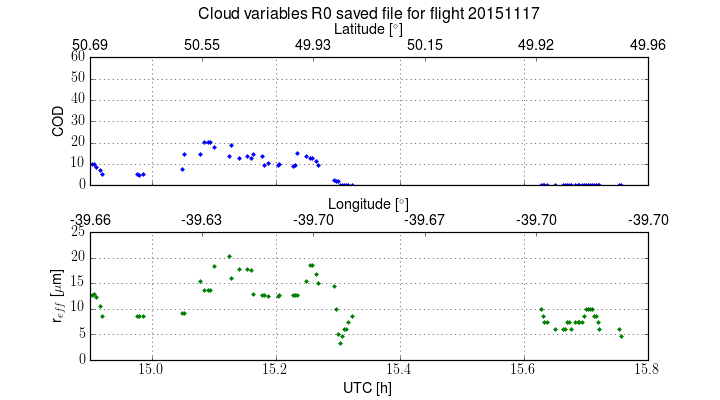

<IPython.core.display.Javascript object>


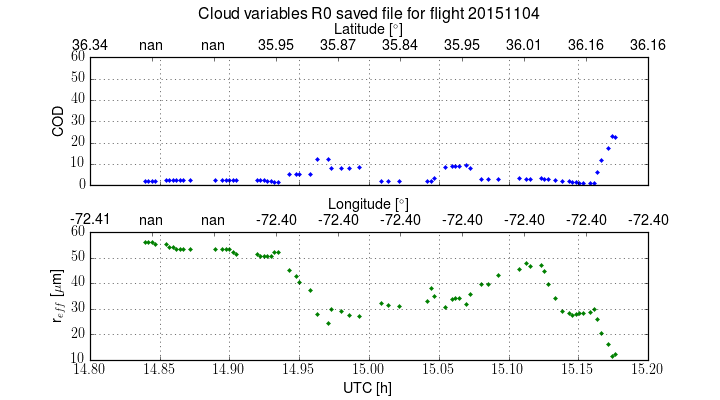

<IPython.core.display.Javascript object>


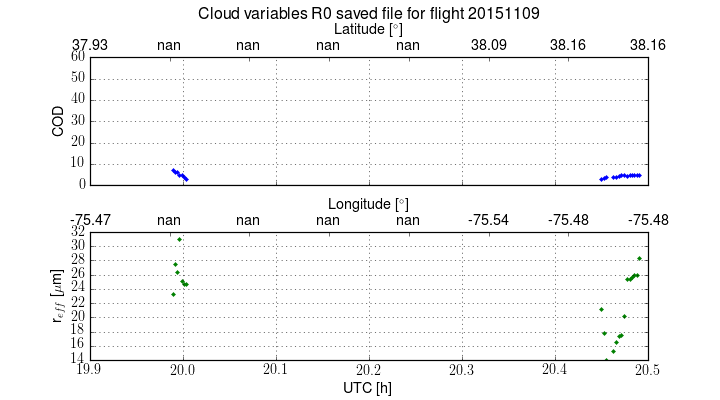

<IPython.core.display.Javascript object>


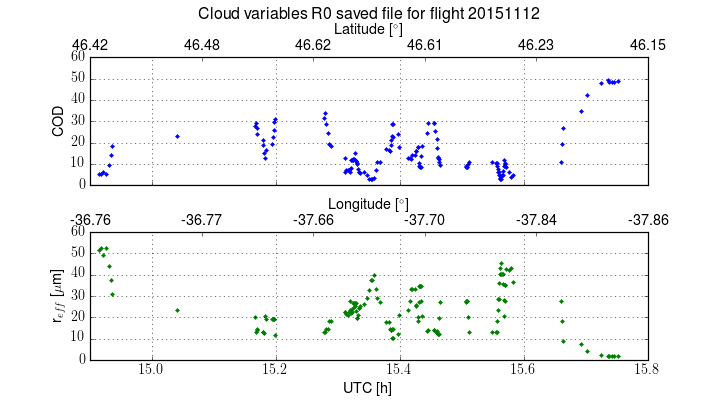

<IPython.core.display.Javascript object>


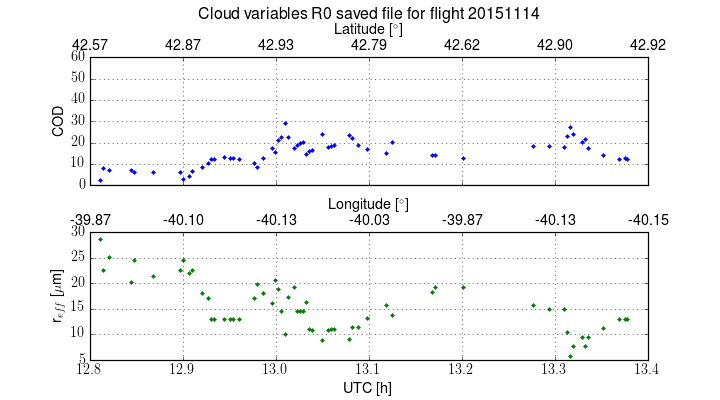

<IPython.core.display.Javascript object>


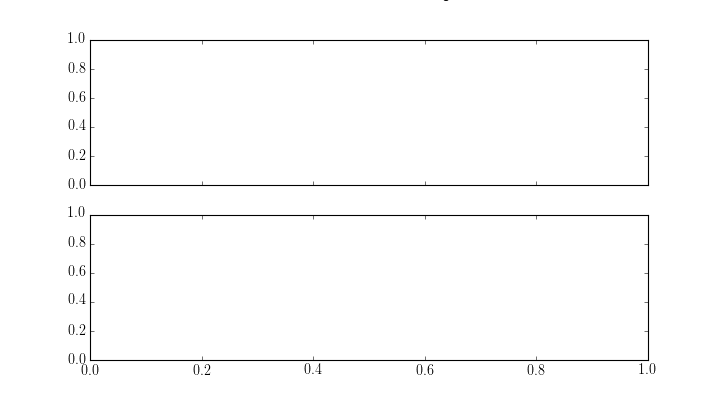

IndexError: list index out of range

In [52]:
for i,d in enumerate(dds):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Cloud variables {} saved file for flight {}'.format(vv,d),y=1.25)
    #ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    ax[0].plot(out_RA[i][nm[0]],out_RA[i]['COD'],'.')
    ax[0].set_ylabel('COD')
    ax[0].set_ylim(0,60)
    ax[0].axhline(0,color='k')
    ax[0].grid()
    axy0 = ax[0].twiny()
    axy0.set_xlim(ax[0].get_xlim())
    xt = ax[0].get_xticks()
    xl = []
    for x in xt:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LAT'][ii]):
            xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))
        else:
            xl.append('{:2.2f}'.format(np.nanmean(out_RA[i]['LAT'][ii-300:ii+300])))
    axy0.set_xticks(xt)
    axy0.set_xticklabels(xl)
    axy0.set_xlabel('Latitude [$^\\circ$]')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy0.set_position([box.x0, box.y0, box.width, box.height*0.88])
    
    ax[1].plot(out_RA[i][nm[0]],out_RA[i]['REF'],'g.')
    ax[1].set_ylabel('r$_{{eff}}$ [$\\mu$m]')
    ax[1].set_xlabel('UTC [h]')
    ax[1].grid()
    axy1 = ax[1].twiny()
    axy1.set_xlim(ax[1].get_xlim())
    x1t = ax[1].get_xticks()
    x1l = []
    for x in x1t:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LON'][ii]):
            x1l.append('{:2.2f}'.format(out_RA[i]['LON'][ii]))
        else:
            x1l.append('{:2.2f}'.format(np.nanmean(out_RA[i]['LON'][ii-300:ii+300])))
    axy1.set_xticks(x1t)
    axy1.set_xticklabels(x1l)
    axy1.set_xlabel('Longitude [$^\\circ$]')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy1.set_position([box.x0, box.y0, box.width, box.height*0.88])
    plt.savefig(fp+'..//zen_ict/{vv}_{}.png'.format(d,vv=vv),dpi=600,transparent=True)

## Combine the data into a single array

In [23]:
ar = {}
for n in rts[0].keys():
    ar[n] = np.array([])

In [24]:
ar['days'] = np.array([])

In [25]:
for i,d in enumerate(dds):
    ar['days'] = np.append(ar['days'],np.zeros_like(rts[i]['utc'])+i)
    for n in rts[0].keys():
        ar[n] = np.append(ar[n],rts[i][n])

## Save the combined array

In [56]:
import hdf5storage as hs

In [57]:
hs.savemat(fp+'..//zen_ict/{}_all_cld_ict.mat'.format(vv),ar)

## Optionally load the all ict file

In [26]:
if not ar:
    ar = hs.loadmat(fp+'..//zen_ict/v3/{}_all_cld_ict.mat'.format(vv))

## plot the data on a map

In [27]:
import plotting_utils as pu

In [28]:
from map_interactive import build_basemap

In [29]:
rts[i]['tau_fl']

array([  2.66666667,   8.        ,   7.13333333,   7.05      ,
         6.21666667,   6.18333333,   6.35      ,   2.85      ,
         4.38333333,   6.63333333,   8.63333333,  10.33333333,
        12.33333333,  12.5       ,  13.33333333,  13.        ,
        13.        ,  12.5       ,  10.5       ,   8.75      ,
        13.08333333,  17.75      ,  15.83333333,  21.5       ,
        22.5       ,  29.25      ,  22.75      ,  17.58333333,
        19.        ,  20.        ,  20.5       ,  14.83333333,
        16.33333333,  16.5       ,  24.16666667,  18.16666667,
        18.33333333,  18.83333333,  23.5       ,  22.08333333,
        18.75      ,  16.88333333,  15.13333333,  20.46666667,
        14.13333333,  14.05      ,  13.05      ,  18.41666667,
        18.41666667,  17.91666667,  23.25      ,  27.25      ,
        24.08333333,  20.58333333,  21.83333333,  17.33333333,
        14.16666667,  12.33333333,  12.83333333,  12.33333333])

In [30]:
for i,daystr in enumerate(dds):
    print rts[i]['lat'][rts[i]['fl']][:,0].shape,rts[i]['lon'][rts[i]['fl']][:,0].shape,rts[i]['tau_fl'].shape

(68L,) (68L,) (68L,)
(69L,) (69L,) (69L,)
(21L,) (21L,) (21L,)
(3L,) (3L,) (0L,)
(0L,) (0L,) (0L,)
(140L,) (140L,) (140L,)
(60L,) (60L,) (60L,)


In [31]:
print rts[i]['tau_fl'].shape
print rts[i]['tau'].shape

(60L,)
(329L,)


In [32]:
print rts[i]['lon'][:,0].shape
print rts[i]['lon'][:,0].shape

(329L,)
(329L,)


In [36]:
import scipy.stats as ss

In [62]:
lons,lats,taus,refs,fls = [],[],[],[],[]
for i,d in enumerate(dds):
    lons.append(np.array(rts[i]['lon'][:,0]))
    lats.append(np.array(rts[i]['lat'][:,0]))
    taus.append(np.array(rts[i]['tau']))
    refs.append(np.array(rts[i]['ref']))
    fls.append(np.array(rts[i]['fl']))
lons,lats,taus,refs,fls = np.hstack(lons),np.hstack(lats),np.hstack(taus),np.hstack(refs),np.hstack(fls)

In [150]:
taufl = ss.binned_statistic_2d( lons[fls],lats[fls],taus[fls], statistic='mean', bins=(25,15),range=[[-55,-35],[40,55]])
reffl = ss.binned_statistic_2d( lons[fls],lats[fls],refs[fls], statistic='mean', bins=(25,15),range=[[-55,-35],[40,55]])

In [154]:
taufl.statistic

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,   1.13333333,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [         nan,       

In [152]:
taufl.x_edge

array([-55. , -54.2, -53.4, -52.6, -51.8, -51. , -50.2, -49.4, -48.6,
       -47.8, -47. , -46.2, -45.4, -44.6, -43.8, -43. , -42.2, -41.4,
       -40.6, -39.8, -39. , -38.2, -37.4, -36.6, -35.8, -35. ])

In [153]:
taufl.y_edge

array([ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.])

<IPython.core.display.Javascript object>


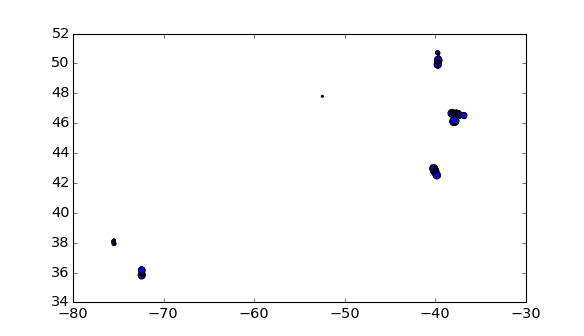

In [135]:
plt.figure()
plt.scatter(lons[fls],lats[fls],taus[fls])

<IPython.core.display.Javascript object>


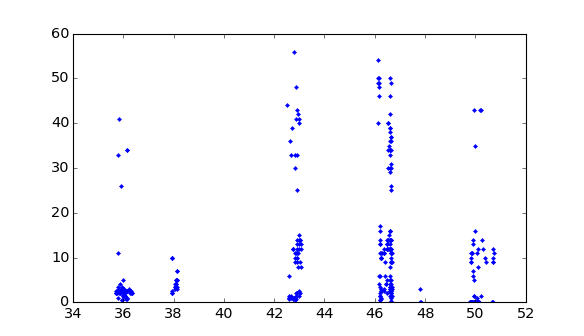

<IPython.core.display.Javascript object>


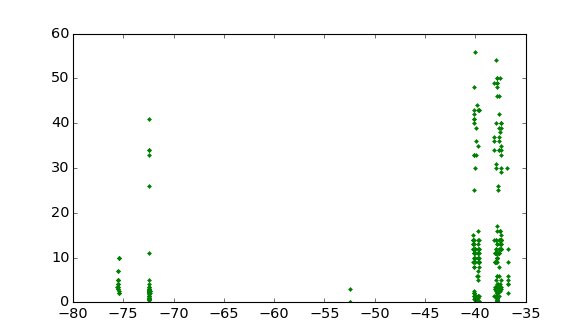

In [129]:
plt.figure()
plt.plot(lats[fls],taus[fls],'.')
plt.figure()
plt.plot(lons[fls],taus[fls],'.g')

In [156]:
taufl.statistic.shape

(25L, 15L)

In [163]:
taufl.x_edge

array([-55. , -54.2, -53.4, -52.6, -51.8, -51. , -50.2, -49.4, -48.6,
       -47.8, -47. , -46.2, -45.4, -44.6, -43.8, -43. , -42.2, -41.4,
       -40.6, -39.8, -39. , -38.2, -37.4, -36.6, -35.8, -35. ])

In [164]:
taufl.y_edge

array([ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.])

In [158]:
taufl.x_edge.shape,taufl.y_edge.shape

((26L,), (16L,))

In [167]:
help(m.pcolor)

Help on method pcolor in module mpl_toolkits.basemap:

pcolor(self, x, y, data, *args, **kwargs) method of mpl_toolkits.basemap.Basemap instance
    Make a pseudo-color plot over the map
    (see matplotlib.pyplot.pcolor documentation).
    
    If ``latlon`` keyword is set to True, x,y are intrepreted as
    longitude and latitude in degrees.  Data and longitudes are
    automatically shifted to match map projection region for cylindrical
    and pseudocylindrical projections, and x,y are transformed to map
    projection coordinates. If ``latlon`` is False (default), x and y
    are assumed to be map projection coordinates.
    
    If x or y are outside projection limb (i.e. they have values > 1.e20)
    they will be convert to masked arrays with those values masked.
    As a result, those values will not be plotted.
    
    If ``tri`` is set to ``True``, an unstructured grid is assumed
    (x,y,data must be 1-d) and matplotlib.pyplot.tricolor is used.
    
    Extra keyword ``ax``

<IPython.core.display.Javascript object>


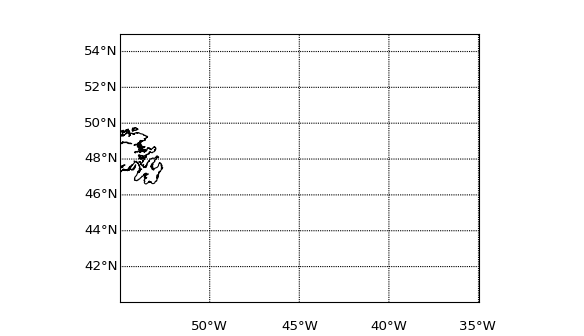

IndexError: too many indices for array

In [166]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-55,40],upper_right=[-35,55],ax=ax,larger=False)
x,y = m((taufl.x_edge[:-1]+taufl.x_edge[1:])/2.0,(taufl.y_edge[:-1]+taufl.y_edge[1:])/2.0)
cc = m.contourf(x,y,taufl.statistic,vmin=0,vmax=26,cmap=plt.cm.gnuplot2_r)
ax.set_title('Mean COD from NAAMES 2015 for boundary layer liquid clouds')
cb = plt.colorbar(cc)
cb.set_label('COD')
#plt.savefig(fp+'../plot/NAAMES_map_COD_stasts.png',dpi=600,transparent=True)

In [132]:
reffl.statistic

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  

<IPython.core.display.Javascript object>


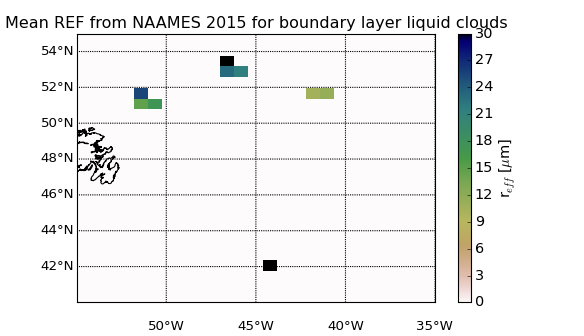

In [122]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-55,40],upper_right=[-35,55],ax=ax,larger=False)
x,y = m(reffl.x_edge,reffl.y_edge)
cc = m.pcolor(x,y,reffl.statistic,vmin=0,vmax=30,cmap=plt.cm.gist_earth_r)
ax.set_title('Mean REF from NAAMES 2015 for boundary layer liquid clouds')
cb = plt.colorbar(cc)
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'../plot/NAAMES_map_ref_stasts.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


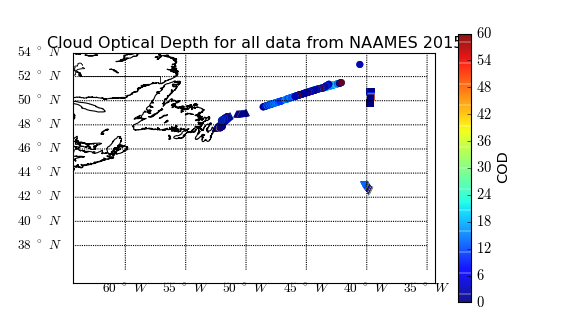

In [91]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-65,36],upper_right=[-35,55],ax=ax,larger=False)
sa = []
ms = ['s','+','d','^','o','x','v']
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][:,0],rts[i]['lat'][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau'],marker=ms[i],
              s=40,alpha=0.7,vmin=0.0,vmax=60.0,edgecolor='None')
    sa.append(sca)
ax.set_title('Cloud Optical Depth for all data from NAAMES 2015')
    #pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('COD')
#plt.savefig(fp+'..//zen_ict/COD_map_all.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


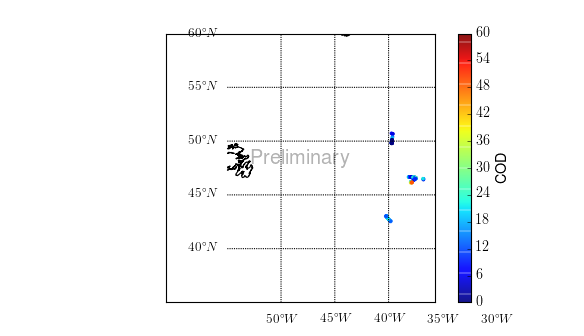

In [88]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-55,35],upper_right=[-30,60],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0],rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=60.0,edgecolor='None')
    sa.append(sca)
pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('COD')
#plt.savefig(fp+'..//zen_ict/COD_map.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


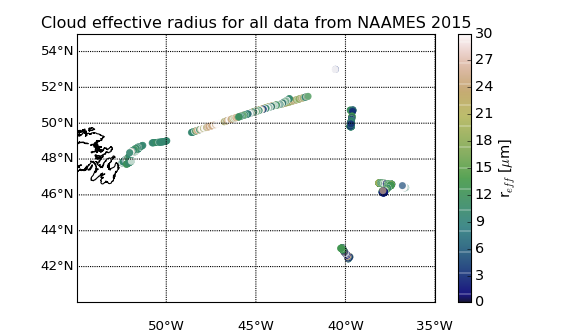

In [124]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-55,40],upper_right=[-35,55],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][:,0],rts[i]['lat'][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref'],
              s=40,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
ax.set_title('Cloud effective radius for all data from NAAMES 2015')
    #pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
#plt.savefig(fp+'..//zen_ict/REF_map_all.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


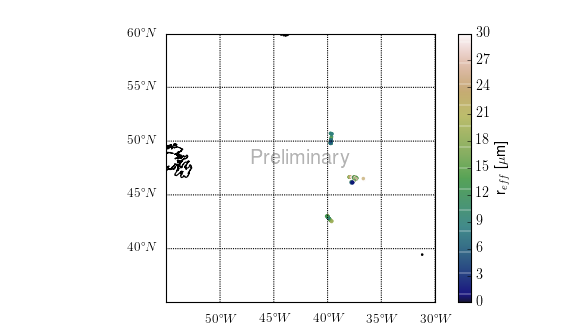

In [74]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-55,35],upper_right=[-30,60],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'..//zen_ict/REF_map.png',transparent=True,dpi=600)

## Plot out some statistics of all retrievals

<IPython.core.display.Javascript object>


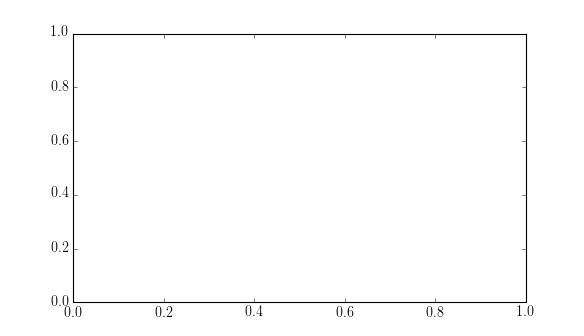

ValueError: x and y must have same first dimension

In [75]:
plt.figure()
plt.plot(ar['lat_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/COD_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


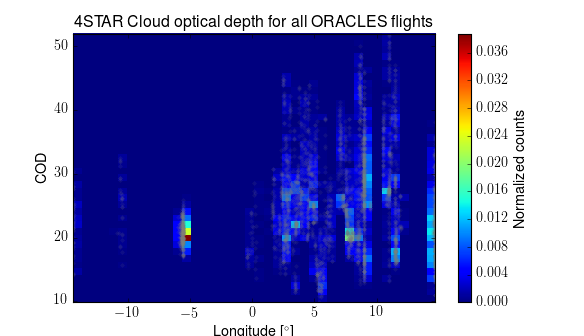

In [56]:
plt.figure()
plt.plot(ar['lon_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/COD_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


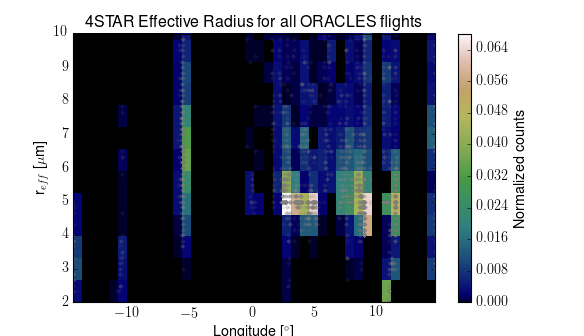

In [57]:
plt.figure()
plt.plot(ar['lon_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
plt.ylim(2,10)
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/ref_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


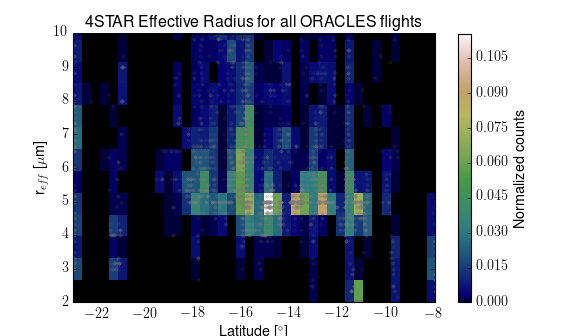

In [58]:
plt.figure()
plt.plot(ar['lat_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.ylim(2,10)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/ref_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


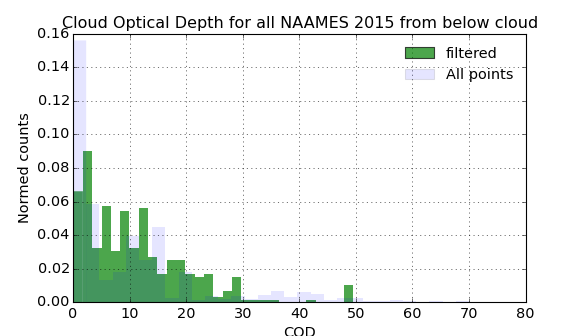

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\function_base.py:229: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\function_base.py:230: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [168]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
#pu.prelim()
plt.title('Cloud Optical Depth for all NAAMES 2015 from below cloud')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/cod_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


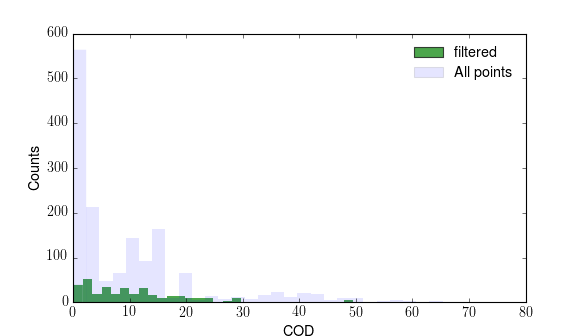

In [99]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,70),label='All points')
plt.ylabel('Counts')
plt.xlabel('COD')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/NAAMES_cod_hist_all.png',transparent=True,dpi=600)

In [116]:
np.nanmean(ar['tau_fl'])

25.342992796332677

In [117]:
np.nanmean(ar['ref_fl'])

8.3607154551407969

<IPython.core.display.Javascript object>


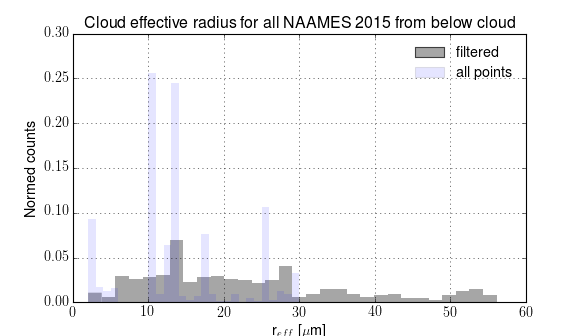

In [96]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim()
plt.title('Cloud effective radius for all NAAMES 2015 from below cloud')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/NAAMES_ref_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


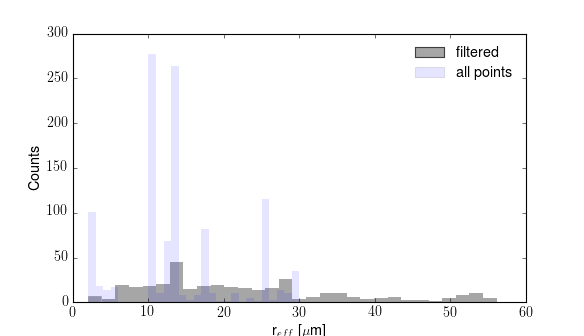

In [98]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,30),label='all points')
plt.ylabel('Counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/NAAMES_ref_hist_all.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


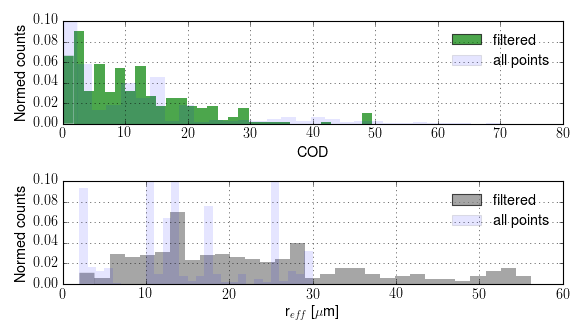

In [103]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].set_ylim(0,0.1)
ax[0].grid()
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylim(0,0.1)
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//zen_ict/NAAMES_ref_cod_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


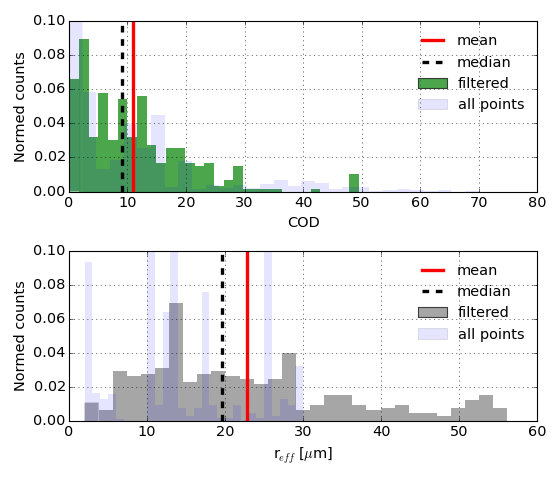

In [177]:
fig,ax = plt.subplots(2,1,figsize=(7,6))
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].axvline(np.nanmean(ar['tau_fl']),color='r',ls='-',linewidth=3,label='mean')
ax[0].axvline(np.nanmedian(ar['tau_fl']),color='k',ls='--',linewidth=3,label='median')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].set_ylim(0,0.1)
ax[0].grid()
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].axvline(np.nanmean(ar['ref_fl']),color='r',ls='-',linewidth=3,label='mean')
ax[1].axvline(np.nanmedian(ar['ref_fl']),color='k',ls='--',linewidth=3,label='median')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylim(0,0.1)
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//plot/NAAMES_ref_cod_hist_x.png',transparent=True,dpi=600)